# 回帰（Regression）
教師あり学習の一種。ある入力データから連続値を予測すること。

In [1]:
# 必要なライブラリのimport
# 機械学習をする際にはほぼ全て必要となるため、予めimportしておくとよい。

# 配列
import numpy as np 
# データ変換・可視化
import pandas as pd
# 機械学習
import sklearn

# 可視化
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# データ可視化
機械学習を行う前にまずデータを観察することが重要。
* 機械学習をしなくても簡単に解ける可能性
* データに異常値、欠損等の不備がある可能性
* 機械学習に使えそうな特徴量を見極める

In [2]:
# ボストンのある地区の物件の価格と特徴量のセット
from sklearn.datasets import load_boston

boston = load_boston()

print(boston.DESCR) # 概要を表示
print(boston.feature_names)# ラベルを表示

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
# 特徴量の確認。DataFrameに格納して確認

df_X = pd.DataFrame(data = boston.data, columns= boston.feature_names)
df_X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [4]:
# 目的変数を確認。
df_y = pd.DataFrame(data = boston.target, columns= ["MEDV"])
df_y.head(10)

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


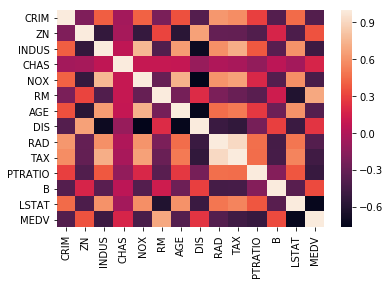

In [5]:
# 回帰では、特徴量から連続値である目的変数を予測する。
# そこで、特徴量（df_X）と目的変数(df_y)の相関を確認する。

df = pd.concat([df_X, df_y], axis=1)

# 特徴量が多いため、ヒートマップで可視化する。
sns.heatmap(df.corr())

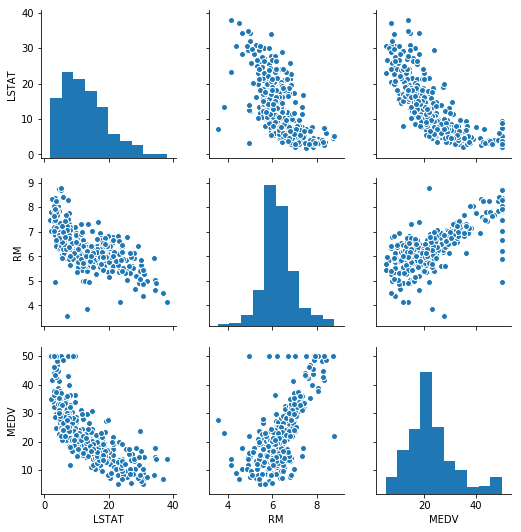

In [7]:
# 相関が強そうな要素を抜き出して表示
sns.pairplot(df.loc[:,['LSTAT','RM',"MEDV"]])

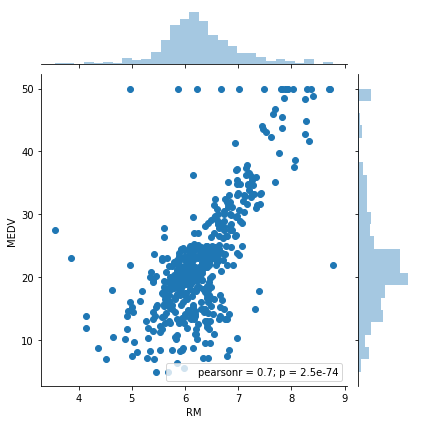

In [9]:
# 特に相関が強い部分を表示
sns.jointplot(x="RM", y="MEDV", data=df.loc[:,['RM',"MEDV"]])

# 学習
可視化により、データの特徴を掴んだ後に実際の学習を行う。

## 使用するアルゴリズム
* 線形回帰
* Regression Tree
* Support Vector Regression

# 前処理
分類の例と同様に、データを訓練用とテスト用に分ける

X_train shape:(379, 1)
X_test shape:(127, 1)
y_train shape:(379,)
y_test shape:(127,)


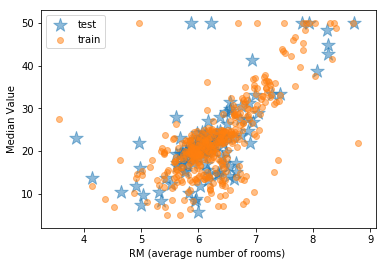

In [105]:
# 分類用の関数
from sklearn.model_selection import train_test_split

# 訓練用とテスト用に分類
# 特徴量はRMを使用する。 目的変数は二次元になっているため、１次元に変換
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,["RM"]].values, df.loc[:,["MEDV"]].values.flatten(), random_state=0)

# 特徴量は（データの数, 特徴量の数）が表示される
print(f"X_train shape:{X_train.shape}")
print(f"X_test shape:{X_test.shape}")
# 目的変数は（データの数）が表示される
print(f"y_train shape:{y_train.shape}")
print(f"y_test shape:{y_test.shape}")


plt.scatter(X_test, y_test, s=200, marker="*", alpha=0.5, label="test")
plt.scatter(X_train, y_train, alpha=0.5, label="train")
plt.xlabel("RM (average number of rooms) ")
plt.ylabel("Median Value")
plt.legend()
plt.show()

# 線形回帰
相関関係を直線モデルで説明する。

### 応用
* Ridge回帰
* Lasso回帰
* Elastic Net

In [106]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 訓練モデル作成
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

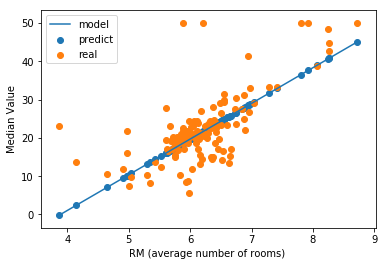

In [107]:
# 予測出力
plt.plot(X_test[sort_idx], model.predict(X_test[sort_idx]), label="model")
plt.scatter(X_test, model.predict(X_test), label="predict")
plt.scatter(X_test, y_test, label="real")
plt.xlabel("RM (average number of rooms) ")
plt.ylabel("Median Value")
plt.legend()
plt.show()

## Regression Tree
決定木ベース。非線形なデータに使用する

In [108]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=3)

# 訓練モデル作成
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

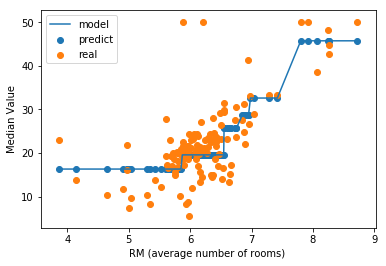

In [109]:
# 回帰直線を図示するのに変数を並び替え
sort_idx = X_test.flatten().argsort()

# 予測出力
plt.plot(X_test[sort_idx], model.predict(X_test[sort_idx]), label="model")
plt.scatter(X_test, model.predict(X_test), label="predict")
plt.scatter(X_test, y_test, label="real")
plt.xlabel("RM (average number of rooms) ")
plt.ylabel("Median Value")
plt.legend()
plt.show()

## SVR
SVMベース。非線型なデータに使用する

In [110]:
from sklearn.svm import SVR
model = SVR()

# 訓練モデル作成
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

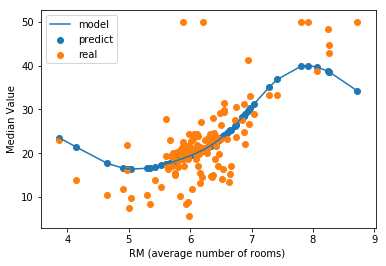

In [111]:
# 回帰直線を図示するのに変数を並び替え
sort_idx = X_test.flatten().argsort()

# 予測出力
plt.plot(X_test[sort_idx], model.predict(X_test[sort_idx]), label="model")
plt.scatter(X_test, model.predict(X_test), label="predict")
plt.scatter(X_test, y_test, label="real")
plt.xlabel("RM (average number of rooms) ")
plt.ylabel("Median Value")
plt.legend()
plt.show()